## Load the data and display the first few rows of the dataframe

In [1]:
import pandas as pd


# Load the dataset
df = pd.read_csv('listings.csv')

# Display the first few rows of the dataframe
df.head()



,id,listing_url,host_id,host_since,latitude,longitude,neighbourhood,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,price
0,12147973,https://www.airbnb.com/rooms/12147973,31303940,2015-04-15,42.282619,-71.133068,Roslindale,House,Entire home/apt,4,...,NaN,NaN,NaN,NaN,NaN,f,moderate,1,NaN,250.0
1,3075044,https://www.airbnb.com/rooms/3075044,2572247,2012-06-07,42.286241,-71.134374,Roslindale,Apartment,Private room,2,...,9.0,10.0,10.0,9.0,9.0,t,moderate,1,1.30,65.0
2,6976,https://www.airbnb.com/rooms/6976,16701,2009-05-11,42.292438,-71.135765,Roslindale,Apartment,Private room,2,...,9.0,10.0,10.0,9.0,10.0,f,moderate,1,0.47,65.0
3,1436513,https://www.airbnb.com/rooms/1436513,6031442,2013-04-21,42.281106,-71.121021,NaN,House,Private room,4,...,10.0,10.0,10.0,10.0,10.0,f,moderate,1,1.00,75.0
4,7651065,https://www.airbnb.com/rooms/7651065,15396970,2014-05-11,42.284512,-71.136258,Roslindale,House,Private room,2,...,10.0,10.0,10.0,9.0,10.0,f,flexible,1,2.25,79.0


## Exploring Data Statistics and Visualizations

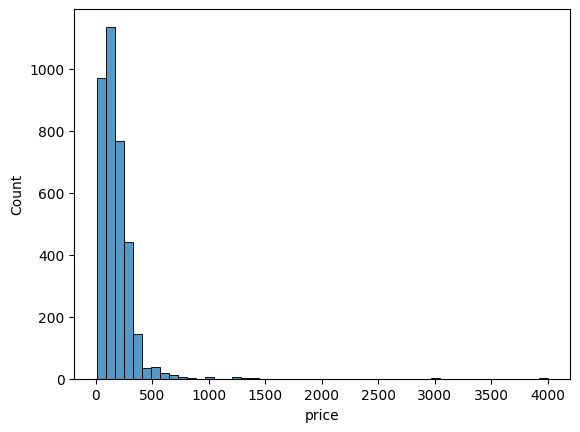

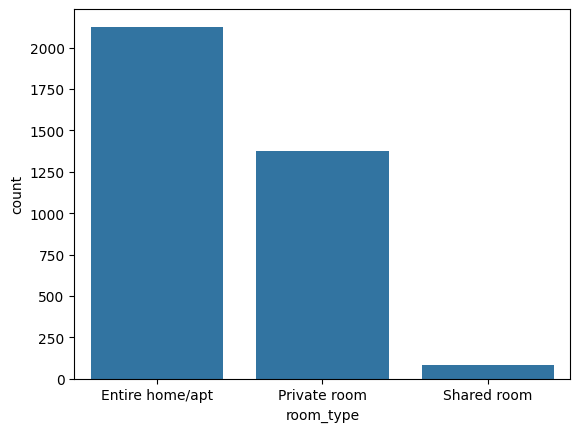

In [2]:
# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize distributions of key features
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'], bins=50)
plt.show()

sns.countplot(x='room_type', data=df)
plt.show()


## Data Preprocessing and Preparation: 
Cleans data, encodes categorical variables, normalizes numerical features, and splits data for machine learning.

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Handle missing values by dropping rows with any missing values
df = df.dropna()

# Convert string categorical variables to numerical values using Label Encoding
label_encoders = {}
categorical_features = ['neighbourhood', 'property_type', 'room_type', 'cancellation_policy', 'instant_bookable']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Normalize numerical features
numerical_features = ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                      'minimum_nights', 'number_of_reviews', 'review_scores_rating', 
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                      'calculated_host_listings_count', 'reviews_per_month']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Drop the 'amenities' feature since it requires more complex preprocessing
df = df.drop(['amenities', 'listing_url', 'host_since'], axis=1)

# Split the data into training and testing sets
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regression Model Training

This code initializes and trains a Random Forest Regressor model, makes predictions (commented out for now), and evaluates Mean Squared Error (MSE) for model performance.

**You can use the trained model to make predictions on new data.:**

* Assuming new_data is a DataFrame with the same structure as X
* new_data = pd.read_csv('new_data.csv')
* new_data = preprocess_new_data(new_data)  # Ensure the same preprocessing steps are applied

* predictions = model.predict(new_data)
* print(predictions)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 10149.69271818182


A Mean Squared Error (MSE) of 10149.69 indicates the average squared difference between the actual and predicted prices. Whether this is "good" or not depends on the context, such as the range of prices and the acceptable error level for the application. 

### following steps:

#### Understand the Range of Prices


To provide context for understanding the MSE, it's important to know the range of price values in your dataset.

In [6]:
print(f'Minimum price: {df["price"].min()}')
print(f'Maximum price: {df["price"].max()}')

Minimum price: 55.0
Maximum price: 725.0


Given that the minimum price is 55 and the maximum price is 725, an MSE of 10149.69 seems relatively high. To put this into perspective, the MSE indicates that, on average, the square of the errors (differences between actual and predicted prices) is 10149.69, which is quite large considering the price range.

## Next Steps to Improve the Model

### Compare with Baseline Models:
Check the performance of simpler models to see if the Random Forest is doing better.

In [8]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

# Baseline model (mean predictor)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
baseline_mse = mean_squared_error(y_test, dummy_pred)
print(f'Baseline Mean Squared Error: {baseline_mse}')

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f'Linear Regression Mean Squared Error: {linear_mse}')


Baseline Mean Squared Error: 14371.757443181821
Linear Regression Mean Squared Error: 343516.53761942324


The Dummy Regressor has a lower MSE compared to the linear regression model, suggesting that, in this case, predicting the mean price performs better than using linear regression. This indicates that the linear regression model might be underfitting or not capturing the complexities of the relationship between the features and the price.

### Evaluate Model Performance with Additional Metrics

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 74.20636363636362
R-squared: 0.28898619272030424


The code identified some ability to predict price (R²=0.2889), but the average difference between predictions and actual prices remains high ($74.21 MAE). To improve this, we can explore creating new informative features (feature engineering) and experiment with different model types and settings (model tuning) in future iterations.

### Feature Importance
Examine feature importance to understand which features contribute most to the predictions.

In [13]:
importances = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)


                           feature  importance
7                     accommodates    0.360511
6                        room_type    0.099388
2                         latitude    0.087838
14            review_scores_rating    0.082450
24               reviews_per_month    0.077729
11                     square_feet    0.043202
9                         bedrooms    0.036745
10                            beds    0.036658
13               number_of_reviews    0.036574
1                          host_id    0.019114
0                               id    0.015284
12                  minimum_nights    0.015039
3                        longitude    0.014006
22             cancellation_policy    0.013822
18     review_scores_communication    0.012400
15          review_scores_accuracy    0.011054
23  calculated_host_listings_count    0.010569
19          review_scores_location    0.007991
4                    neighbourhood    0.004582
8                        bathrooms    0.003480
5            

The results show feature importance values ranking from 0.361 for "accommodates" to 0.000271 for "instant_bookable."

### Random Forest Regression with Feature Selection and Tuning

Optimizing Random Forest Regression with top feature selection and tuned parameters for enhanced prediction accuracy.

In [14]:
# Step 1: Select top features based on importance
top_features = feature_importance_df.head(8)['feature'].tolist()

# Step 2: Subset the training and test sets to include only the top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 3: Initialize the model with updated parameters or perform hyperparameter tuning
model_selected = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Step 4: Retrain the model on selected features
model_selected.fit(X_train_selected, y_train)

# Step 5: Make predictions using the updated model
y_pred_selected = model_selected.predict(X_test_selected)

# Step 6: Evaluate the model performance
mse_selected = mean_squared_error(y_test, y_pred_selected)
print(f'Mean Squared Error (Selected Features): {mse_selected}')



Mean Squared Error (Selected Features): 9031.688508723912


Reducing the Mean Squared Error (MSE) by selecting top features suggests significant enhancement in the model's predictive accuracy.

### Model Evaluation and Hyperparameter Tuning for Random Forest Regression
The code sets up and evaluates a Random Forest regression model using sklearn. It compares its performance with baseline models, identifies key features, and optimizes model parameters to improve prediction accuracy.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined and prepared

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the initial model
model.fit(X_train, y_train)

# Baseline model (mean predictor)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
baseline_mse = mean_squared_error(y_test, dummy_pred)
print(f'Baseline Mean Squared Error: {baseline_mse}')

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

# Random Forest model evaluation
y_pred = model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest Mean Absolute Error: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)

print(f'\nBest Mean Squared Error after Hyperparameter Tuning: {best_mse}')


Baseline Mean Squared Error: 14371.757443181821
Linear Regression Mean Squared Error: 343516.53761942324
Random Forest Mean Squared Error: 10149.69271818182
Random Forest Mean Absolute Error: 74.20636363636362
Random Forest R-squared: 0.28898619272030424
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Mean Squared Error after Hyperparameter Tuning: 10149.69271818182


The Random Forest model shows superior performance with a Mean Squared Error of 10149.69, outperforming both the baseline (14371.76) and linear regression (343516.54) models. Even after hyperparameter tuning, the model's effectiveness remains consistent, maintaining a Mean Absolute Error of 74.21 and an R-squared of 0.289, indicating it explains approximately 29% of the variance in the data.